# Choose a Data Set

You can choose to analyze any data that you would like! Remember, you need 1000 rows of non-null data in order to get 5 points for the "Data" criteria of my [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing). Consider looking at [Kaggle](https://www.kaggle.com/datasets) or [free APIs](https://free-apis.github.io/#/browse) for datasets of this size. Alternatively, you can scrape the web to make your own dataset! :D

Once you have chosen your dataset, please read your data into a dataframe and call `.info()` below. If you don't call `info` I will give you 0 points for the first criteria described on the [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing).

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
df = pd.read_csv('PokemonDB.csv')
df.columns

Index(['#', 'Name', 'Variation', 'Type1', 'Type2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
      dtype='object')

In [3]:
df = df.fillna('None')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   #          1190 non-null   int64 
 1   Name       1190 non-null   object
 2   Variation  1190 non-null   object
 3   Type1      1190 non-null   object
 4   Type2      1190 non-null   object
 5   Total      1190 non-null   int64 
 6   HP         1190 non-null   int64 
 7   Attack     1190 non-null   int64 
 8   Defense    1190 non-null   int64 
 9   Sp. Atk    1190 non-null   int64 
 10  Sp. Def    1190 non-null   int64 
 11  Speed      1190 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 111.7+ KB


In [5]:
df.head()

,#,Name,Variation,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,None,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,None,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,None,Grass,Poison,525,80,82,83,100,100,80
3,3,Venusaur,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,Charmander,None,Fire,None,309,39,52,43,60,50,65


# My Question

### What is the Standard Deviation of Sp. Atk? And, given this, how impressive is Dedenne?

# My Analysis

In [6]:
idx = 0
for pokemon in df["Name"]:
    if "Dedenne" in pokemon:
        break
    idx += 1
df.loc[idx]

#                 702
Name          Dedenne
Variation        None
Type1        Electric
Type2           Fairy
Total             431
HP                 67
Attack             58
Defense            57
Sp. Atk            81
Sp. Def            67
Speed             101
Name: 838, dtype: object

 ### This allows me to find the pokemon im trying to solve for by using its name.

The Average of Sp.Atk = 72.75630252100841
Standard Deviation of Sp.Atk = 32.658635650199145


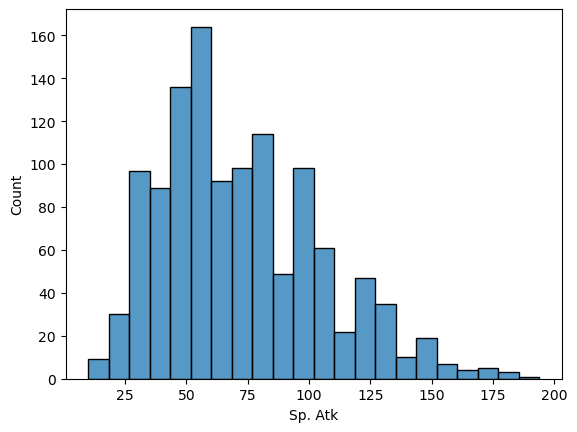

In [7]:
sns.histplot(df,x='Sp. Atk')
def dev(column):
    return column.std()
stdSp = dev(df["Sp. Atk"])
avgSp = df["Sp. Atk"].mean()
print ("The Average of Sp.Atk =",avgSp)
print("Standard Deviation of Sp.Atk =",stdSp)

## This is the graph of all the pokemons Sp. Atk.

In [8]:
lSp = avgSp - stdSp
uSp = avgSp + stdSp
print("Most of the data lands between", lSp, "and", uSp)

Most of the data lands between 40.09766687080926 and 105.41493817120755


### Subtracting and adding the standard deviation to the average to find where most of the data lands.

In [9]:
idx = 0
for pokemon in df["Name"]:
    if "Dedenne" in pokemon:
        break
    idx += 1
SpScore = ((df.loc[idx]['Sp. Atk']) - avgSp) / stdSp 
print( "The pokemon's Sp. Atk score =", SpScore)

The pokemon's Sp. Atk score = 0.252420142938253


### The code here allows you to plug in any pokemon name and finds its Z-score for Sp. Atk.

In [10]:
InSp = 0
AllSp = 0
AboveSp = 0
UnderSp = 0
for pokemon in df['Sp. Atk']:
    if pokemon >= 72 and pokemon <= 104:
        InSp += 1
        AllSp += 1
    elif pokemon <= 72:
        UnderSp += 1
        AllSp += 1
    elif pokemon >= 104:
        AboveSp += 1
        AllSp += 1
        
print("In range of Dedenne:",InSp)
print("Under the range of Dedenne:",UnderSp)
print("Above the range of Dedenne:",AboveSp)
print("All pokemon:",AllSp)

In range of Dedenne: 311
Under the range of Dedenne: 670
Above the range of Dedenne: 209
All pokemon: 1190


### Shows how many more pokemon are in that range with Dedenne. Also how many are below and above.

# My Answer

***The Standard Deviation of Sp. Atk is 32.65. This means that most of the data landed 32.65 Sp. Atk from the average. The average being 72.75 Sp. Atk, meaning that the data landed between 40 Sp. Atk to 105 Sp. Atk. Dedenne is pretty average compared to the data with a Z-score of 0.25. The reason this score is average is because its inside the range of where most data is landing. Z-score shows how many deviations its above the average. So this means Dedenne is 0.25 deviations above the mean putting them in this range of 72 Sp. Atk to 104 Sp. Atk. Which is ok at best but still not bad since 670 other pokemon are under Dedenne's range, 311 In their range and only 209 Above their range out of 1190 pokemon i find it pretty above average.***